In [59]:
from fastai.tabular import *

# For learning

In [107]:
df = pd.read_csv('forecasts.csv'); df

,surfline_spot_id,name,timestamp,avg_height,swell1_height,swell1_period,swell1_direction,swell1_is_favorable_direction,swell2_height,swell2_period,swell2_direction,swell2_is_favorable_direction,swell3_height,swell3_period,swell3_direction,swell3_is_favorable_direction
0,5842041f4e65fad6a770893f,Leo Carillo,2020-02-22 11:15:21.477666,2.50,0.56,12,284.06,N,0.36,11,175.78,Y,1.41,14,217.97,Y
1,584204214e65fad6a7709b9f,Malibu First Point,2020-02-22 11:15:21.477666,2.50,1.41,14,215.16,Y,0.36,12,282.66,N,0.30,11,178.59,Y
2,5842041f4e65fad6a770883c,Windansea,2020-02-22 11:15:21.477666,3.50,0.85,10,288.28,Y,0.52,8,284.06,Y,0.36,11,182.81,N
3,5842041f4e65fad6a7708805,Steamer Lane,2020-02-22 11:15:21.477666,4.25,2.20,5,312.19,Y,0.20,11,180.00,Y,6.50,12,293.91,N
4,5842041f4e65fad6a7708840,Sunset Cliffs,2020-02-22 11:15:21.477666,3.50,0.69,12,295.31,N,0.62,10,285.47,N,0.49,8,284.06,N
5,5842041f4e65fad6a770893f,Leo Carillo,2020-02-22 16:00:15.196466,2.50,0.56,12,284.06,N,0.69,10,284.06,N,0.36,11,175.78,Y
6,584204214e65fad6a7709b9f,Malibu First Point,2020-02-22 16:00:15.196466,2.50,0.36,10,285.47,N,1.41,14,215.16,Y,0.30,11,178.59,Y
7,5842041f4e65fad6a770883c,Windansea,2020-02-22 16:00:15.196466,3.00,0.85,10,288.28,Y,0.52,8,284.06,Y,0.36,11,182.81,N
8,5842041f4e65fad6a7708805,Steamer Lane,2020-02-22 16:00:15.196466,4.25,2.20,5,312.19,Y,0.20,11,180.00,Y,6.50,12,293.91,N
9,5842041f4e65fad6a7708840,Sunset Cliffs,2020-02-22 16:00:15.196466,3.00,0.69,12,295.31,N,0.62,10,285.47,N,0.49,8,284.06,N


In [62]:
rando_df = df.sample(frac=1).reset_index(drop=True); rando_df

,surfline_spot_id,name,timestamp,avg_height,swell1_height,swell1_period,swell1_direction,swell1_is_favorable_direction,swell2_height,swell2_period,swell2_direction,swell2_is_favorable_direction,swell3_height,swell3_period,swell3_direction,swell3_is_favorable_direction
0,5842041f4e65fad6a7708805,Steamer Lane,2020-03-05 00:00:20.193297,4.00,7.61,10,302.34,N,0.98,16,306.56,Y,1.41,14,196.88,N
1,5842041f4e65fad6a770883c,Windansea,2020-02-29 00:01:17.86717,4.00,1.54,16,285.47,Y,2.00,11,285.47,Y,2.13,15,199.69,Y
2,584204214e65fad6a7709b9f,Malibu First Point,2020-02-22 11:15:21.477666,2.50,1.41,14,215.16,Y,0.36,12,282.66,N,0.30,11,178.59,Y
3,5842041f4e65fad6a7708805,Steamer Lane,2020-02-23 00:01:09.420606,4.25,2.20,5,312.19,Y,6.50,12,293.91,N,0.20,11,180.00,Y
4,5842041f4e65fad6a770893f,Leo Carillo,2020-03-04 00:01:06.943063,3.00,2.46,12,282.66,N,0.66,11,192.66,N,0.89,4,247.50,Y
5,5842041f4e65fad6a770883c,Windansea,2020-03-02 00:00:21.470078,4.00,2.07,12,286.88,Y,0.23,18,288.28,Y,0.72,18,205.31,Y
6,584204204e65fad6a77096b1,Ventura Point,2020-03-01 00:01:19.072075,3.50,0.00,0,0.00,N,2.20,14,281.25,N,0.00,0,0.00,N
7,584204214e65fad6a7709b9f,Malibu First Point,2020-02-25 16:00:48.962124,2.50,0.52,4,260.16,N,0.95,8,279.84,N,0.56,12,216.56,Y
8,5842041f4e65fad6a770883c,Windansea,2020-02-23 00:01:09.420606,3.00,0.85,10,288.28,Y,0.36,11,182.81,N,0.52,8,284.06,Y
9,5842041f4e65fad6a7708805,Steamer Lane,2020-02-27 16:00:19.116624,5.00,3.12,8,313.59,Y,1.61,20,289.69,N,4.89,12,285.47,N


In [63]:
dep_var = 'avg_height'
cat_names = ['swell1_is_favorable_direction', 'swell2_is_favorable_direction', 'swell3_is_favorable_direction']
cont_names = ['swell1_height', 'swell1_period', 'swell2_height', 'swell2_period', 'swell3_height', 'swell3_period']
procs = [FillMissing, Categorify, Normalize]

In [64]:
test = TabularList.from_df(rando_df.iloc[140:173].copy(), path='.', cat_names=cat_names, cont_names=cont_names, procs=procs)

In [65]:
data = (TabularList.from_df(rando_df, path='.', cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_idx(list(range(140,173)))
                           .label_from_df(cols=dep_var)
                           .add_test(test)
                           .databunch(bs=10))

In [66]:
data.show_batch(rows=5)

swell1_is_favorable_direction,swell2_is_favorable_direction,swell3_is_favorable_direction,swell1_height,swell1_period,swell2_height,swell2_period,swell3_height,swell3_period,target
Y,N,N,-0.7321,-0.3812,-0.6540,1.7298,0.1887,0.2565,3.5
N,N,N,-0.9300,-2.3180,0.2683,0.4370,0.5464,0.6392,2.5
N,N,Y,-0.6661,2.0399,0.0440,0.2216,-0.1602,-1.2743,2.5
N,N,N,-0.9300,-2.3180,-0.0370,0.2216,-0.9831,-2.0397,3.5
N,N,N,-0.1789,0.3451,-0.2614,1.2988,0.6896,0.8305,3.5


In [67]:
learn = tabular_learner(data, layers=[200,100], metrics=rmse)

In [68]:
learn.fit(5, 1e-2)

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,9.659488,2.897575,1.670476,00:00
1,5.389093,1.662317,1.263545,00:00
2,3.413742,0.818311,0.880439,00:00
3,2.460235,0.551751,0.729642,00:00
4,1.890238,0.562360,0.722143,00:00


In [69]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


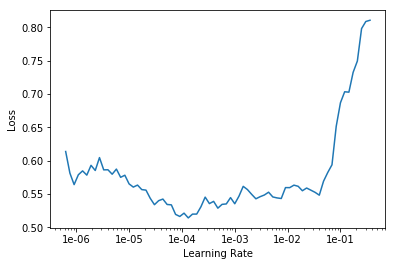

In [70]:
learn.recorder.plot()

In [71]:
learn.unfreeze()

In [72]:
learn.fit(30, 1e-2)

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,0.824691,0.468680,0.669023,00:01
1,0.727431,0.449087,0.651748,00:01
2,0.756339,0.314868,0.537624,00:00
3,0.739745,0.464099,0.659072,00:00
4,0.686032,0.500546,0.699477,00:01
5,0.666915,0.361717,0.594954,00:01
6,0.624620,0.312343,0.543863,00:00
7,0.591488,0.365955,0.580219,00:00
8,0.545719,0.342058,0.574941,00:00
9,0.540976,0.467170,0.678374,00:00


In [82]:
row = df.iloc[110]; row

surfline_spot_id                   5842041f4e65fad6a7708805
name                                           Steamer Lane
timestamp                        2020-03-01 16:00:17.150659
avg_height                                              5.5
swell1_height                                          5.09
swell1_period                                            11
swell1_direction                                     299.53
swell1_is_favorable_direction                             N
swell2_height                                          7.51
swell2_period                                             8
swell2_direction                                     302.34
swell2_is_favorable_direction                             N
swell3_height                                           2.1
swell3_period                                            16
swell3_direction                                      292.5
swell3_is_favorable_direction                             N
Name: 110, dtype: object

In [83]:
learn.predict(row)

(FloatItem [6.105109], tensor([6.1051]), tensor([6.1051]))

In [84]:
learn.save('stage-1')

In [90]:
learn.load('stage-1');

In [91]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


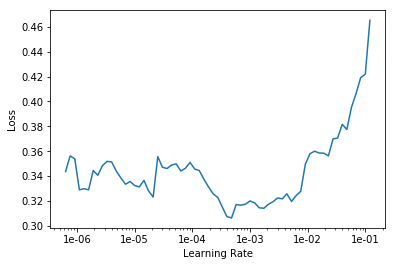

In [92]:
learn.recorder.plot()

In [88]:
learn.unfreeze()

In [93]:
learn.fit(20, 1e-4)

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,0.394602,0.228018,0.474529,00:00
1,0.366377,0.252852,0.499341,00:01
2,0.385946,0.263058,0.507012,00:01
3,0.379889,0.244096,0.491244,00:00
4,0.355020,0.241348,0.487751,00:00
5,0.356074,0.229671,0.476106,00:00
6,0.347237,0.243096,0.489370,00:00
7,0.381719,0.239531,0.484607,00:00
8,0.379988,0.244894,0.490881,00:01
9,0.372708,0.243268,0.488887,00:00


In [112]:
row = df.iloc[170]; row

surfline_spot_id                   5842041f4e65fad6a7708805
name                                           Steamer Lane
timestamp                        2020-03-06 00:01:37.653389
avg_height                                                4
swell1_height                                          3.81
swell1_period                                             8
swell1_direction                                     316.41
swell1_is_favorable_direction                             Y
swell2_height                                          6.59
swell2_period                                            14
swell2_direction                                     302.34
swell2_is_favorable_direction                             N
swell3_height                                           0.3
swell3_period                                            16
swell3_direction                                     191.25
swell3_is_favorable_direction                             N
Name: 170, dtype: object

In [113]:
learn.predict(row)

(FloatItem [4.233532], tensor([4.2335]), tensor([4.2335]))

In [96]:
learn.save('stage-2')

In [97]:
learn.load('stage-2');

In [98]:
learn.export()

# For production stuff

In [99]:
archives = [
    {
        'surfline_spot_id': '1',
        'name': 'Blah',
        'timestamp': 'Something',
        'swell1_height': 1.41,
        'swell1_period': 5,
        'swell1_is_favorable_direction': 'N',
        'swell2_height': 1.77,
        'swell2_period': 12,
        'swell2_is_favorable_direction': 'N',
        'swell3_height': 1.25,
        'swell3_period': 12,
        'swell3_is_favorable_direction': 'N'
    }
]

In [100]:
path = Path('.')

In [101]:
learn = load_learner(path)

In [102]:
df = pd.DataFrame.from_dict(archives); df

,name,surfline_spot_id,swell1_height,swell1_is_favorable_direction,swell1_period,swell2_height,swell2_is_favorable_direction,swell2_period,swell3_height,swell3_is_favorable_direction,swell3_period,timestamp
0,Blah,1,1.41,N,5,1.77,N,12,1.25,N,12,Something


In [103]:
row = df.iloc[0]; df

,name,surfline_spot_id,swell1_height,swell1_is_favorable_direction,swell1_period,swell2_height,swell2_is_favorable_direction,swell2_period,swell3_height,swell3_is_favorable_direction,swell3_period,timestamp
0,Blah,1,1.41,N,5,1.77,N,12,1.25,N,12,Something


In [104]:
_, _, tensor = learn.predict(row); tensor

tensor([3.0346])

In [105]:
tensor.item()

3.0346391201019287